## Hypothesis
To predict the incentive level requested to predict the incentive level requested to shut down or lower 5 degrees during the winter
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeW, EnergyC, MC, ComfNW, HabitC, Winter_avg

In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
#survey$IncHomeS[survey$IncHomeS==99] = NA;
#survey$IncHomeS[survey$IncHomeS==999] = NA;

#survey <- survey[survey$HomeS>60,];
#survey <- survey[survey$HomeS<80,];

#survey <- survey[survey$HomeW>60,];
#survey <- survey[survey$HomeW<80,];

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       3       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 61  42  68 132 102  79  88  79  11 

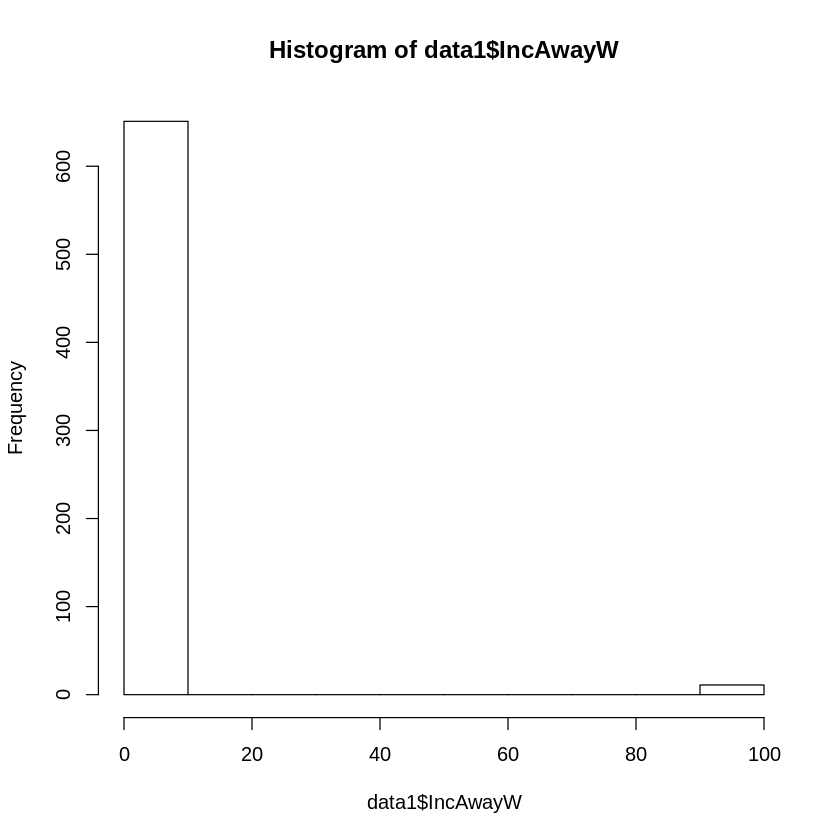

In [2]:
summary(data1$IncAwayW)
table(data1$IncAwayW)
hist(data1$IncAwayW)

In [3]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      


In [4]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 100
[1] 632 100


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       3       5       6       7      99 


  1   2   3   4   5   6   7   8  99 
 59  40  64 128  97  71  86  76  11 

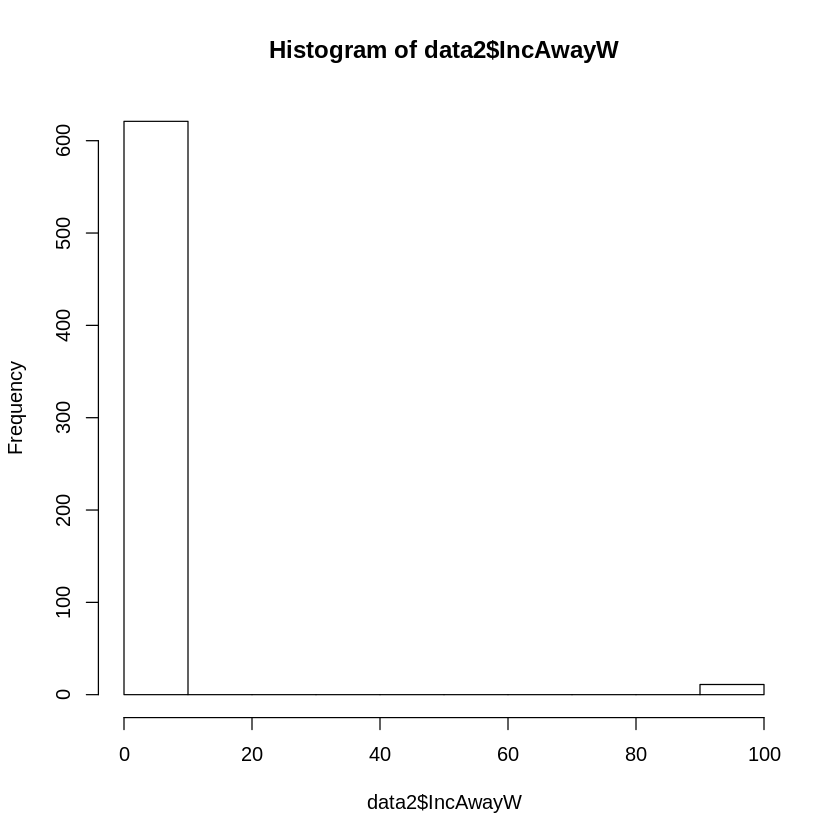

In [5]:
summary(data2$IncAwayW)
table(data2$IncAwayW)
hist(data2$IncAwayW)

In [6]:
sort(names(data2))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
 [61] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
 [66] "Latitude"   "MC"         "MC1"        "MC2"        "MC3"       
 [71] "MC4"        "MC5"        "MCBill"     "OwnRent"    "PBC1"      
 [76] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "Political" 
 [81] "RewardForm" "SN"         "SN1"        "SN2"        "SN3"       
 [86] "SN4"        "Sqft"       "SqftCate"   "State"      "SubNorm"   
 [91] "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg" "Trust1"    
 [96] "Trust2"     "Trust3"     "Trust4"     "Winter_avg" "X.9to5"

In [7]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNW",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"Winter_avg",     
"HomeW")

In [8]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "Atti1"      "Atti2"      "Atti3"     
  [6] "Atti4"      "BillS"      "BillW"      "CashYN"     "ComfNS"    
 [11] "ComfNS1"    "ComfNS2"    "ComfNS3"    "ComfNW"     "ComfNW1"   
 [16] "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3"  "ControlN4" 
 [21] "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"     "Educ"      
 [26] "EmerRForm"  "EnergyC"    "EnergyC1"   "EnergyC2"   "EnergyC3"  
 [31] "EnergyC4"   "Ethnic"     "Frugal1"    "Frugal2"    "Frugal3"   
 [36] "Gender"     "HabitC"     "HabitC1"    "HabitC2"    "HabitC3"   
 [41] "HabitC4"    "HabitC5"    "HabitC6"    "HabitC7"    "HabitE1"   
 [46] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
 [51] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
 [56] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
 [61] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
 [66] "Latitude"   "MC"         "MC1"        "MC2"        "MC3"       
 [71] "MC4"        "MC5"        "MCBill"     "OwnRent"    "PBC1"      
 [76] "PBC2"       "PBC3R"      "PBC4"       "PBC5"       "Political" 
 [81] "RewardForm" "SN"         "SN1"        "SN2"        "SN3"       
 [86] "SN4"        "Sqft"       "SqftCate"   "State"      "SubNorm"   
 [91] "SubNorm1"   "SubNorm2"   "SubNorm3"   "Summer_avg" "Trust1"    
 [96] "Trust2"     "Trust3"     "Trust4"     "Winter_avg" "X.9to5"

[1] "Age"        "Atti"       "ComfNW"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HomeW"      "HouseholdS" "Income"     "Latitude"   "MC"        
[16] "OwnRent"    "PBC"        "Political"  "SN"         "SqftCate"  
[21] "SubNorm"    "Trust"      "Winter_avg"

In [9]:
data1 <- data2[, which(names(data2) %in% c("IncAwayW",IVS))];
sort(names(data1))

[1] "Age"        "Atti"       "ComfNW"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitC"     "HabitG"     "HouseholdS"
[11] "IncAwayW"   "Income"     "Latitude"   "MC"         "OwnRent"   
[16] "Political"  "SN"         "SqftCate"   "SubNorm"    "Winter_avg"

In [10]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [11]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [12]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncAwayW"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Latitude"   "EnergyC"    "MC"         "ComfNW"     "Atti"      
[16] "SubNorm"    "SN"         "HabitG"     "HabitC"     "Winter_avg"

In [13]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [14]:
hiCor(data2,.7)

,Latitude,Winter_avg
Latitude,1.00,0.82
Winter_avg,0.82,1.00


In [15]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.14
    EnergyC    MC  Atti SubNorm    SN HabitG HabitC
PC1   -0.42 -0.34 -0.44   -0.37 -0.23  -0.31  -0.29
[1] 0.25
      Age OwnRent SqftCate HouseholdS Income
PC2 -0.34    -0.5    -0.52      -0.27  -0.44
[1] 0.34
    Latitude Winter_avg
PC3    -0.66      -0.66
[1] 0.42
    Gender HouseholdS Ethnic  Educ ComfNW HabitC
PC4   0.36       0.48  -0.32 -0.33   0.49   -0.3
[1] 0.48
    Political Ethnic Income  Educ EnergyC   MC HabitG HabitC
PC5     -0.53   0.22  -0.22 -0.41   -0.24 0.21   0.41   0.28
[1] 0.54
     Age Gender HouseholdS Ethnic Income SubNorm    SN
PC6 0.51   0.38       -0.2   0.31  -0.25   -0.26 -0.42
[1] 0.59
    IncAwayW Political Educ ComfNW SubNorm
PC7     0.43     -0.24 0.43   0.55    0.25
[1] 0.64
    IncAwayW Gender Ethnic   MC ComfNW HabitG
PC8    -0.75  -0.25  -0.21 0.23   0.24   0.27
[1] 0.68
    IncAwayW  Age Political Ethnic SubNorm HabitG HabitC
PC9     0.31 0.24      0.21  -0.65   -0.27   0.26   0.27
[1] 0.73
     IncAwayW  Age Gender HouseholdS Income En

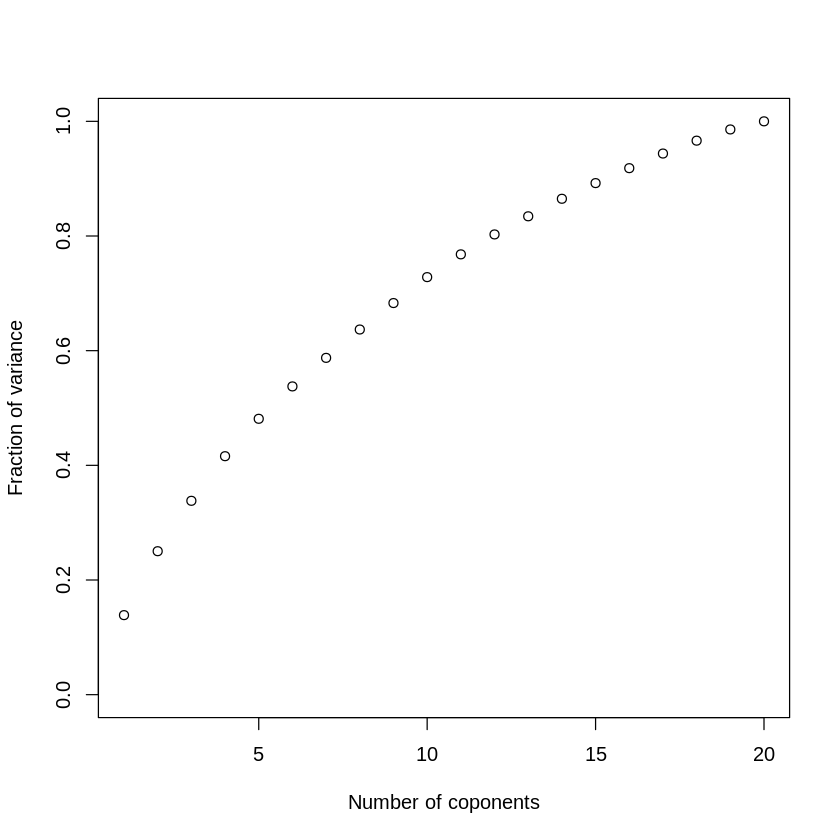

In [16]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [17]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [18]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Winter_avg,20,0.52
Latitude,11,0.51
Atti,15,0.42
EnergyC,12,0.40
SqftCate,5,0.36
OwnRent,4,0.31
HouseholdS,6,0.26
Income,9,0.26
SubNorm,16,0.26
HabitC,19,0.25
MC,13,0.22


In [19]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [20]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNW', 'Latitude', 'Ethnic')
IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'EnergyC', 'MC', 'ComfNW', 'HabitC', 'Winter_avg')

In [21]:
fmla <- as.formula(paste("IncAwayW",paste(IndepPred,collapse="+"),sep="~"));

In [22]:
table(data2[,"IncAwayW"])


  1   2   3   4   5   6   7   8  99 
 59  40  64 128  97  71  86  76  11 

In [23]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-10.60  -3.61  -1.47   0.61  93.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  12.4064     6.3140    1.96    0.050 *
Age           0.0538     0.0494    1.09    0.277  
Gender       -0.7135     1.0681   -0.67    0.504  
OwnRent      -0.8840     1.1518   -0.77    0.443  
SqftCate     -0.6653     0.5572   -1.19    0.233  
HouseholdS    0.0800     0.4741    0.17    0.866  
Political    -0.6701     0.6507   -1.03    0.303  
Ethnic        1.3421     1.3833    0.97    0.332  
Income        0.5079     0.2927    1.74    0.083 .
Educ         -0.6405     0.4834   -1.33    0.186  
Latitude     -0.1188     0.1373   -0.87    0.387  
EnergyC      -0.2398     0.4018   -0.60    0.551  
MC           -0.0964     0.4941   -0.20    0.845  
ComfNW        0.1057     0.3126    0.34    0.735  
HabitC        0.6592     0.3799    1.74    0.083 .
Winter_avg   -0.9392     0.9361   -1.00    0.

In [24]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-14.87  -5.29  -2.59   0.36  89.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  25.2964    15.1610    1.67    0.096 .
Age          -0.0446     0.1022   -0.44    0.663  
Gender       -2.0428     2.1790   -0.94    0.349  
OwnRent      -2.3357     2.2857   -1.02    0.308  
SqftCate     -0.8786     1.1276   -0.78    0.437  
HouseholdS   -0.0255     0.8953   -0.03    0.977  
Political     0.4814     1.3676    0.35    0.725  
Ethnic        1.9605     2.5477    0.77    0.442  
Income        0.9159     0.5769    1.59    0.114  
Educ          0.0821     0.9744    0.08    0.933  
Latitude     -0.2274     0.3146   -0.72    0.470  
EnergyC      -1.1439     0.8367   -1.37    0.173  
MC           -0.9666     1.0585   -0.91    0.362  
ComfNW        0.4296     0.6350    0.68    0.499  
HabitC        1.1962     0.7624    1.57    0.118  
Winter_avg   -3

In [25]:
mod = lm(fmla,data=data2,subs=data2$Latitude>37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude > 37)

Residuals:
   Min     1Q Median     3Q    Max 
-10.18  -2.64  -0.42   1.42  86.68 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.76146    7.88891    0.10   0.9232   
Age          0.12487    0.04435    2.82   0.0052 **
Gender      -0.01394    0.97804   -0.01   0.9886   
OwnRent      1.04863    1.08809    0.96   0.3359   
SqftCate    -0.90199    0.50729   -1.78   0.0763 . 
HouseholdS   0.28121    0.46186    0.61   0.5430   
Political   -1.27180    0.58206   -2.19   0.0296 * 
Ethnic       1.13537    1.40113    0.81   0.4183   
Income       0.13682    0.27359    0.50   0.6173   
Educ        -1.01463    0.43949   -2.31   0.0216 * 
Latitude    -0.00137    0.18282   -0.01   0.9940   
EnergyC      0.42521    0.35976    1.18   0.2380   
MC           0.65190    0.43690    1.49   0.1366   
ComfNW      -0.02210    0.28353   -0.08   0.9379   
HabitC       0.29715    0.35033    0.85   0.3969   

In [26]:
#17 states with highest winter average temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==3)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    3)

Residuals:
   Min     1Q Median     3Q    Max 
-4.290 -1.504 -0.141  1.800  4.116 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   6.6309     2.9883    2.22    0.029 *
Age           0.0217     0.0189    1.15    0.254  
Gender        0.2798     0.4438    0.63    0.530  
OwnRent       0.1511     0.4904    0.31    0.759  
SqftCate     -0.2598     0.2264   -1.15    0.254  
HouseholdS    0.0213     0.2036    0.10    0.917  
Political    -0.1481     0.2615   -0.57    0.572  
Ethnic        1.2404     0.6605    1.88    0.063 .
Income       -0.0628     0.1249   -0.50    0.616  
Educ         -0.1320     0.2077   -0.64    0.526  
Latitude     -0.0774     0.0508   -1.52    0.131  
EnergyC       0.0753     0.1675    0.45    0.654  
MC           -0.0495     0.2152   -0.23    0.818  
ComfNW        0.2744     0.1232    2.23    0.028 *
HabitC       -0.10

In [27]:
#17 middle states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==2)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    2)

Residuals:
   Min     1Q Median     3Q    Max 
-13.66  -3.18  -0.64   2.05  81.06 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -10.7679    10.9042   -0.99    0.325  
Age           0.1687     0.0668    2.53    0.012 *
Gender       -0.7399     1.4253   -0.52    0.604  
OwnRent       1.5225     1.5483    0.98    0.327  
SqftCate     -0.7835     0.7301   -1.07    0.285  
HouseholdS   -0.1868     0.6672   -0.28    0.780  
Political    -1.3188     0.8419   -1.57    0.119  
Ethnic        1.0031     2.0052    0.50    0.617  
Income        0.0668     0.3982    0.17    0.867  
Educ         -1.4997     0.6159   -2.44    0.016 *
Latitude      0.1819     0.2199    0.83    0.409  
EnergyC       0.5870     0.5028    1.17    0.244  
MC            0.9272     0.6025    1.54    0.125  
ComfNW        0.1003     0.4166    0.24    0.810  
HabitC        0.70

In [28]:
#bottom 17 states according to average winter temp
mod = lm(fmla,data=data2,subs=data2$Winter_avg==1)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Winter_avg == 
    1)

Residuals:
   Min     1Q Median     3Q    Max 
-12.60  -5.19  -2.36   0.09  91.92 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  21.2214    12.0037    1.77    0.078 .
Age           0.0117     0.0918    0.13    0.899  
Gender       -0.8582     1.9932   -0.43    0.667  
OwnRent      -2.3271     2.1491   -1.08    0.280  
SqftCate     -0.9280     1.0326   -0.90    0.370  
HouseholdS    0.4690     0.8384    0.56    0.576  
Political    -0.0504     1.2319   -0.04    0.967  
Ethnic        1.8490     2.3775    0.78    0.437  
Income        0.8758     0.5281    1.66    0.098 .
Educ         -0.0955     0.9062   -0.11    0.916  
Latitude     -0.2617     0.2617   -1.00    0.318  
EnergyC      -1.0353     0.7739   -1.34    0.182  
MC           -0.7113     0.9540   -0.75    0.456  
ComfNW        0.0196     0.5853    0.03    0.973  
HabitC        0.86

In [29]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,25.3,25.3,0.098,0.754
Gender,1,188.9,188.9,0.735,0.392
OwnRent,1,327.6,327.6,1.275,0.260
SqftCate,1,2.9,2.9,0.011,0.915
HouseholdS,1,29.4,29.4,0.114,0.735
Political,1,162.1,162.1,0.631,0.428
Ethnic,1,179.8,179.8,0.700,0.404
Income,1,799.2,799.2,3.111,0.079
Educ,1,14.6,14.6,0.057,0.812
Latitude,1,320.1,320.1,1.246,0.265


In [30]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncAwayW        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.99       0.99       0.92       1.00       0.99       0.99       0.93 
    Ethnic     Income       Educ   Latitude    EnergyC         MC     ComfNW 
      0.97       0.99       0.98       0.43       0.51       0.79       0.98 
      Atti    SubNorm         SN     HabitG     HabitC Winter_avg 
      0.42       0.76       0.92       0.86       0.89       0.12 

Loadings:
           Factor1 Factor2
EnergyC     0.69          
Atti        0.75          
Latitude            0.73  
Winter_avg          0.91  
IncAwayW                  
Age                       
Gender                    
OwnRent                   
SqftCate                  
HouseholdS                
Political                 
Ethnic                    
Income                    
Educ                      
MC          0.46          
ComfNW                    
SubNorm

In [31]:
mod = lm(IncAwayW~ComfNW+EnergyC+Age+Ethnic+MC+Political+Educ,data=data2)
summary(mod)
#plot(mod)


Call:
lm(formula = IncAwayW ~ ComfNW + EnergyC + Age + Ethnic + MC + 
    Political + Educ, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
 -7.73  -3.28  -1.51   0.24  94.00 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   8.7382     4.1434    2.11    0.035 *
ComfNW       -0.1290     0.2938   -0.44    0.661  
EnergyC      -0.2496     0.3927   -0.64    0.525  
Age           0.0433     0.0453    0.95    0.340  
Ethnic        0.6172     1.3655    0.45    0.651  
MC            0.0674     0.4871    0.14    0.890  
Political    -0.7561     0.6410   -1.18    0.239  
Educ         -0.4112     0.4585   -0.90    0.370  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12 on 624 degrees of freedom
Multiple R-squared:  0.00821,	Adjusted R-squared:  -0.00292 
F-statistic: 0.738 on 7 and 624 DF,  p-value: 0.64


ERROR: Error in tapply(mod$residuals, data2$IncHomeS, mean): arguments must have same length


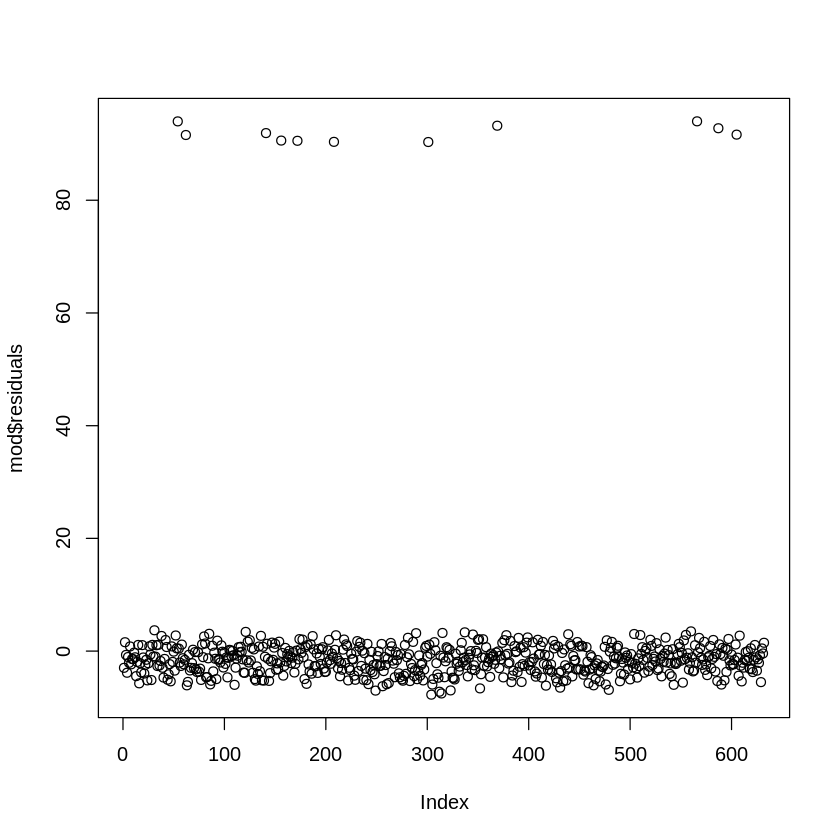

In [32]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [ ]:
mod = lm(IncHomeS~ComfNS+Age,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2,data=data2)
summary(mod1)

In [ ]:
library(mgcv)


In [ ]:
mGam = gam(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+s(Age),data=data2)
summary(mGam)


In [ ]:
plot(mGam)

In [ ]:
mod1 = lm(IncHomeS~I(ComfNS3<=3)+I(ComfNS3==7)+Age+HabitC2+ Political,data=data2)
summary(mod1)


In [ ]:
anova(mod1)

In [ ]:
drop1(mod1)

In [ ]:
library(bnlearn)

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

In [ ]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)

In [ ]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)